## INTRODUCTION
The freestyle format of hackathons has time and again stimulated groundbreaking and innovative data insights and technologies. 
This project is based on the dataset uploaded at The Kaggle University Club Hackathon - UCI Machine Learning - Drug Review Dataset.

### Prompt

Machine learning has permeated nearly all fields and disciplines of study. One hot topic is using natural language processing and sentiment analysis to identify, extract, and make use of subjective information. The UCI ML Drug Review dataset provides patient reviews on specific drugs along with related conditions and a 10-star patient rating system reflecting overall patient satisfaction. The data was obtained by crawling online pharmaceutical review sites. This data was published in a study on sentiment analysis of drug experience over multiple facets, ex. sentiments learned on specific aspects such as effectiveness and side effects (see the acknowledgments section to learn more).

### Find the datasets in the Github dir. or follow the link below
https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018?datasetId=76158&sortBy=voteCount

### About the datasets
The Drug Review Data Set is of shape (161297, 7) i.e. It has 7 features including the review and 161297 Data Points or entries.

The features are 'drugName' which is the name of the drug, 'condition' which is the condition the patient is suffering from, 'review' is the patients review, 'rating' is the 10-star patient rating for the drug, 'date' is the date of the entry and the 'usefulcount' is the number of users who found the review useful.

### About the project
With this dataset, I have tried to answer the following questions/conditions:
* What insights can we gain from exploring and visualizing our data?

* How does sentiment play into rating and usefulness of reviews?

* Can we create a way for people to find the best medication for their illness?

* What machine learning models work best for predicting the sentiment or rating based on review?

### This notebook contains DNN models for the Winter 2018 Kaggle University Hackathon

In [1]:
# Import Libs.
import pandas as pd
import numpy as np
import text_normalizer as tn
import nltk

import spacy
import pandas as pd
import numpy as np
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import contractions_dict
import unicodedata

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn import metrics

import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from keras.utils import to_categorical
from gensim.models import Word2Vec

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from IPython.core.display import HTML
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

# To center our generated images
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Creating custom functions
* Text Normalizer function
* Measure model performance functions

In [2]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"I&#039;ve": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def expand_contractions(text, contraction_mapping = CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags = re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) \
                                   if contraction_mapping.get(match) \
                                    else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_chars(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
        
    filtered_text = " ".join(filtered_tokens)
    return filtered_text

def normalize_corpus(corpus, html_stripping = True, contaction_expansion = True, 
                     accented_char_removal = True, text_lower_case = True, 
                     text_lemmatization = True, special_char_removal = True, 
                     stopword_removal = True):
    normalized_corpus = []
    #normalize each doc. in corpus
    for doc in corpus:
        # strip html
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented chars
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lower case
        if text_lower_case:
            doc = doc.lower()
        # expand contractions
        if contaction_expansion:
            doc = expand_contractions(doc)
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', " ", doc)
        # insert space btw special chars
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special chars
        if special_char_removal:
            doc = remove_special_chars(doc)
        # remove extra white-space
        doc = re.sub(' +', ' ', doc)
        #remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc)
        
        normalized_corpus.append(doc) #append the doc into the list
    return normalized_corpus

def get_metrics(true_labels, predicted_labels):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'), 4))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 4))
                        
def train_predict_model(classifier, train_features, train_labels, test_features, test_labels):   
    classifier.fit(train_features, train_labels)
    predictions = classifier.predict(test_features) 
    return predictions    

def display_confusion_matrix(true_labels, predicted_labels, classes = [1,0]):
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true = true_labels, y_pred = predicted_labels, labels = classes)
    cm_frame = pd.DataFrame(data = cm, 
                            columns = pd.MultiIndex(levels = [['Predicted:'], classes], codes=level_labels), 
                            index = pd.MultiIndex(levels = [['Actual:'], classes], codes=level_labels)
                           ) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes = [1,0]):
    report = metrics.classification_report(y_true = true_labels, y_pred = predicted_labels, labels = classes) 
    print(report)
    
def display_model_performance_metrics(true_labels, predicted_labels, classes = [1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    
    get_metrics(true_labels = true_labels, predicted_labels = predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    
    display_classification_report(true_labels = true_labels, predicted_labels = predicted_labels, classes = classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    
    display_confusion_matrix(true_labels = true_labels, predicted_labels = predicted_labels, classes = classes)

In [3]:
# Import Datasets
df_train = pd.read_csv("D:\DataSc\Datasets\drugsComTrain_raw.csv")
df_test = pd.read_csv("D:\DataSc\Datasets\drugsComTest_raw.csv")

In [4]:
nlp = spacy.load('en_core_web_sm')
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [6]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [7]:
df_train = df_train.sort_values(by='usefulCount', ascending = False)

print('Train dataset shape:     ', df_train.shape)
print('Test dataset shape:      ', df_test.shape)
print('Train dataset features:  ', list(df_train))
print('Train dataset has same features as Test dataset: ', list(df_train) == list(df_test))
print('Train/Test ratio:        ', df_train.values.shape[0] / df_test.values.shape[0])

Train dataset shape:      (161297, 7)
Test dataset shape:       (53766, 7)
Train dataset features:   ['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount']
Train dataset has same features as Test dataset:  True
Train/Test ratio:         2.999981400885318


For the Neural Network model, I will be using the top 80,000 reviews of the dataset only(based on their UsefulCount).
We will split the above 80,000 reviews to train the model and test it on the test dataset. The reason for the above is that the text normalization of 161K reviews takes too much time for my PC to execute.

Although, Neural Networks are very efficient for large datasets. My PC is a potatoe

In [8]:
df_zero = df_train[:80000]

print('Train dataset shape:     ', df_zero.shape)
print('Test dataset shape:      ', df_zero.shape)
print('Train dataset features:  ', list(df_zero))
print('Train dataset has same features as Test dataset: ', list(df_zero) == list(df_zero))

Train dataset shape:      (80000, 7)
Test dataset shape:       (80000, 7)
Train dataset features:   ['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount']
Train dataset has same features as Test dataset:  True


In [9]:
df_zero.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
20185,229467,Lurasidone,Bipolar Disorde,"""I am Bipolar II and have been taking Lamictal...",6,21-Mar-16,16
101399,96936,Ambien,Insomnia,"""I have taken 2 1/2 and I&#039;m wide awake""",10,12-Aug-16,16
141948,119211,Advil Liqui-Gels,Period Pain,"""I suffer with endometriosis. Due to this the ...",9,17-Aug-14,16
45332,111384,Ledipasvir / sofosbuvir,Hepatitis C,"""I had geno type 1 A probably been at least 40...",1,16-Mar-16,16
6939,210954,Mirtazapine,Major Depressive Disorde,"""Have been on sertraline and citalapram both u...",3,22-Dec-15,16


In [10]:
df_zero = df_zero.reset_index()
df_zero.tail()

,index,uniqueID,drugName,condition,review,rating,date,usefulCount
79995,20185,229467,Lurasidone,Bipolar Disorde,"""I am Bipolar II and have been taking Lamictal...",6,21-Mar-16,16
79996,101399,96936,Ambien,Insomnia,"""I have taken 2 1/2 and I&#039;m wide awake""",10,12-Aug-16,16
79997,141948,119211,Advil Liqui-Gels,Period Pain,"""I suffer with endometriosis. Due to this the ...",9,17-Aug-14,16
79998,45332,111384,Ledipasvir / sofosbuvir,Hepatitis C,"""I had geno type 1 A probably been at least 40...",1,16-Mar-16,16
79999,6939,210954,Mirtazapine,Major Depressive Disorde,"""Have been on sertraline and citalapram both u...",3,22-Dec-15,16


In [11]:
df_zero = df_zero.drop(['index'], axis = 1)
df_zero.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
1,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
2,131116,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
3,182560,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
4,119151,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,5-Aug-08,949


In [12]:
# Convert date object into datetime
df_zero['date'] = pd.to_datetime(df_zero['date'], errors = 'coerce')
print(len(df_zero))

# Drop null values
df_zero = df_zero[~(df_zero.condition.isnull())]
df_zero = df_zero[~(df_zero.drugName.isnull())]
df_zero = df_zero[~(df_zero.review.isnull())]

print(len(df_zero))

df_zero = df_zero.reset_index()
df_zero.tail(20)

80000
79829


,index,uniqueID,drugName,condition,review,rating,date,usefulCount
79809,79980,56289,Humira,Psoriatic Arthritis,"""I have used this product with great success f...",10,2015-12-01,16
79810,79981,204219,Fluphenazine,Psychosis,"""I&#039;ve taking Prolixin since the 70&#039;s...",10,2014-12-20,16
79811,79982,64068,Sertraline,Depression,"""I&#039;ve been all over the place in my head....",4,2017-01-25,16
79812,79983,128297,Phentermine,Weight Loss,"""Okay, so, I never thought I&#039;d ever write...",8,2016-01-05,16
79813,79984,169884,Aspirin / butalbital / caffeine,Migraine,"""I have used this drug since 1979 @ age 27. Tw...",8,2009-02-10,16
79814,79985,112062,Gabapentin,Pain,"""I&#039;ve been gradually increasing gabapenti...",1,2017-06-13,16
79815,79986,51618,Aczone,Acne,""" I am 28, have struggled with acne for 10 ye...",10,2015-06-02,16
79816,79987,64892,Sertraline,Depression,"""When I first started taking this I was feelin...",7,2015-05-17,16
79817,79988,164455,Diclofenac,Pain,"""Been on this medication for a week now. My pa...",4,2014-12-22,16
79818,79989,162362,Triamcinolone,Allergic Rhinitis,"""I have ear popping from sinus problems. It to...",10,2009-08-04,16


In [13]:
span_list = []

for i, j in enumerate(df_zero['condition']):
    if '</span>' in j:
        span_list.append(i)

print(len(span_list))

175


In [14]:
df_zero = df_zero.drop(df_zero.index[span_list])
df_zero = df_zero.drop(['index'], axis = 1)
df_zero = df_zero.reset_index()

df_zero.head()

,index,uniqueID,drugName,condition,review,rating,date,usefulCount
0,0,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,2008-07-31,1291
1,1,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,2008-07-31,1291
2,2,131116,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,2009-04-01,1247
3,3,182560,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,2009-04-01,1247
4,4,119151,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,2008-08-05,949


In [15]:
df_zero = df_zero.drop(['index'], axis = 1)
df_zero.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
79649,229467,Lurasidone,Bipolar Disorde,"""I am Bipolar II and have been taking Lamictal...",6,2016-03-21,16
79650,96936,Ambien,Insomnia,"""I have taken 2 1/2 and I&#039;m wide awake""",10,2016-08-12,16
79651,119211,Advil Liqui-Gels,Period Pain,"""I suffer with endometriosis. Due to this the ...",9,2014-08-17,16
79652,111384,Ledipasvir / sofosbuvir,Hepatitis C,"""I had geno type 1 A probably been at least 40...",1,2016-03-16,16
79653,210954,Mirtazapine,Major Depressive Disorde,"""Have been on sertraline and citalapram both u...",3,2015-12-22,16


In [16]:
df_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79654 entries, 0 to 79653
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   uniqueID     79654 non-null  int64         
 1   drugName     79654 non-null  object        
 2   condition    79654 non-null  object        
 3   review       79654 non-null  object        
 4   rating       79654 non-null  int64         
 5   date         79654 non-null  datetime64[ns]
 6   usefulCount  79654 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 4.3+ MB


In [17]:
df_new = df_zero[['drugName', 'condition', 'review', 'rating']].copy()
df_new.head()

,drugName,condition,review,rating
0,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10
1,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10
2,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10
3,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10
4,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9


## Note:
Note that we will train our model based on positive and negative sentiment classes. We can perform a multi-class sentiment classification but I think our model accuracy would decrease. 

So, we do have certain limitations with the dataset:
* Sentiment analysis using sentiment word dictionary has low reliability. For example, if there are 0 positive words and 1 negative word, it is classified as negative. So, even if the ratings are good, the computer would comapre the total negative and positive words in the review, and give the sentiment based on the ratio, which can be misleading to humans.
* UsefulCount may tend to be higher for older reviews as the number of cumulated site visitors increases. Therefore, I have considered the reviews which have usefulCount more than 30.

### Converting ratings into sentiments

In [18]:
# If rating is more than 5 the we assign the sentiment as postive, otherwise neagtive!
df_new['sentiment_rating'] = df_new["rating"].apply(lambda x: 'positive' if x > 5 else 'negative')
df_new.tail()

,drugName,condition,review,rating,sentiment_rating
79649,Lurasidone,Bipolar Disorde,"""I am Bipolar II and have been taking Lamictal...",6,positive
79650,Ambien,Insomnia,"""I have taken 2 1/2 and I&#039;m wide awake""",10,positive
79651,Advil Liqui-Gels,Period Pain,"""I suffer with endometriosis. Due to this the ...",9,positive
79652,Ledipasvir / sofosbuvir,Hepatitis C,"""I had geno type 1 A probably been at least 40...",1,negative
79653,Mirtazapine,Major Depressive Disorde,"""Have been on sertraline and citalapram both u...",3,negative


In [19]:
reviews = np.array(df_new.review)

In [20]:
reviews.shape

(79654,)

In [21]:
%time norm_reviews = normalize_corpus(reviews)

CPU times: total: 15min 29s
Wall time: 17min 47s


In [22]:
norm_reviews_copy = norm_reviews

In [23]:
df_new['normalised_review'] = norm_reviews_copy
df_new.head()

,drugName,condition,review,rating,sentiment_rating,normalised_review
0,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,positive,remember read people opinion online drug take ...
1,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,positive,remember read people opinion online drug take ...
2,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,positive,iud year think good thing ever first get put b...
3,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,positive,iud year think good thing ever first get put b...
4,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,positive,zoloft 50 mg two year relaxed easy go person z...


In [24]:
print(len(norm_reviews))
print(len(norm_reviews_copy))

79654
79654


In [25]:
sentiment_train = np.array(df_new.sentiment_rating)

In [27]:
# Dividing the dataset
X_train, y_train_senti = norm_reviews, sentiment_train

In [28]:
print("Train dataset length:     ", len(X_train))
print("Train sentiment dataset length:      ", len(y_train_senti))

Train dataset length:      79654
Train sentiment dataset length:       79654


In [29]:
df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


For our DL models, we need to explicitly declare/convert our categories. We will use label encoder as well as one-hot-encoder to encode our classes 

In [30]:
le = LabelEncoder()
num_classes = 2

# tokenize train reviews & encode train labels
tokenized_train = [tokenizer.tokenize(text) for text in X_train]
y_tr = le.fit_transform(y_train_senti)
y_train = keras.utils.to_categorical(y_tr, num_classes)

In [31]:
# print class label encoding map and encoded labels
print('Sentiment class label map:', dict(zip(le.classes_, le.transform(le.classes_))))
print('Sample test label transformation: \n' + '-' * 65,
      '\nActual labels:             ', y_train_senti[:3],
      '\nEncoded Labels:            ', y_tr[:3],
      '\nOne hot encoded labels:    ', y_train[:3])

Sentiment class label map: {'negative': 0, 'positive': 1}
Sample test label transformation: 
----------------------------------------------------------------- 
Actual labels:              ['positive' 'positive' 'positive'] 
Encoded Labels:             [1 1 1] 
One hot encoded labels:     [[0. 1.]
 [0. 1.]
 [0. 1.]]


In [32]:
# build word2vec model
w2v_num_features = 500
w2v_model = gensim.models.Word2Vec(tokenized_train, vector_size = w2v_num_features, min_count = 10, sample = 1e-3, window = 150)

def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.key_to_index.keys())
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype = "float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    
    return np.array(features)

In [33]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus = tokenized_train, 
                                                     model = w2v_model,
                                                     num_features = 500
                                                    )


print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape)

Word2Vec model:> Train features shape: (79654, 500)


### We will train two models and try to pedict the test dataset with them 

## DNN model 1

In [34]:
# Creating a DNN model function
def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, activation='relu', input_shape=(num_input_features,)))
    dnn_model.add(Dropout(0.2))
    
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(2))
    dnn_model.add(Activation('softmax')) # Using softmax function

    dnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return dnn_model

w2v_dnn = construct_deepnn_architecture(num_input_features=500)

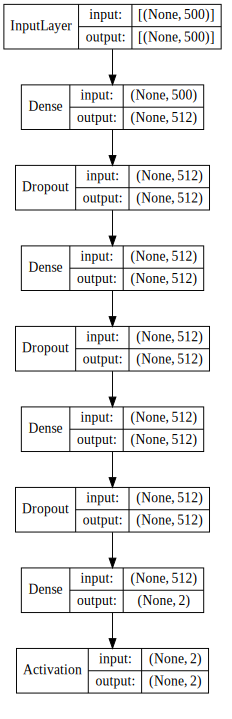

In [35]:
# Display the model
SVG(model_to_dot(w2v_dnn, show_shapes=True, show_layer_names = False, dpi = 70,
                 rankdir = 'TB').create(prog = 'dot', format = 'svg'))

In [36]:
batch_size = 100
w2v_dnn.fit(avg_wv_train_features, y_train, epochs = 6, batch_size=batch_size, shuffle=True, validation_split = 0.1, verbose = 1)

Epoch 1/6
717/717 [==============================] - 8s 10ms/step - loss: 0.3560 - accuracy: 0.8516 - val_loss: 0.4786 - val_accuracy: 0.7818
Epoch 2/6
717/717 [==============================] - 7s 10ms/step - loss: 0.3234 - accuracy: 0.8641 - val_loss: 0.4781 - val_accuracy: 0.7822
Epoch 3/6
717/717 [==============================] - 7s 10ms/step - loss: 0.3055 - accuracy: 0.8724 - val_loss: 0.4995 - val_accuracy: 0.7926
Epoch 4/6
717/717 [==============================] - 7s 9ms/step - loss: 0.2893 - accuracy: 0.8782 - val_loss: 0.4819 - val_accuracy: 0.7831
Epoch 5/6
717/717 [==============================] - 7s 10ms/step - loss: 0.2708 - accuracy: 0.8863 - val_loss: 0.5039 - val_accuracy: 0.7963
Epoch 6/6
717/717 [==============================] - 8s 11ms/step - loss: 0.2531 - accuracy: 0.8944 - val_loss: 0.5086 - val_accuracy: 0.7932


## DNN model 2

In [37]:
def construct_deepnn_architecture_two(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, activation='relu', input_shape=(num_input_features,)))
    dnn_model.add(Dropout(0.2))
    
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(2))
    dnn_model.add(Activation('sigmoid')) # Using sigmoid function

    dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return dnn_model

w2v_dnn_2 = construct_deepnn_architecture_two(num_input_features=500)

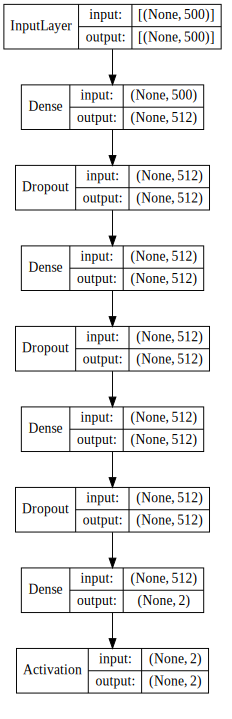

In [38]:
# Viz. the model
SVG(model_to_dot(w2v_dnn, show_shapes=True, show_layer_names=False, dpi=70,
                 rankdir='TB').create(prog='dot', format='svg'))

In [39]:
batch_size = 100
w2v_dnn_2.fit(avg_wv_train_features, y_train, epochs = 5, batch_size = batch_size, shuffle = True, validation_split = 0.1, verbose = 1)

Epoch 1/5
717/717 [==============================] - 8s 10ms/step - loss: 0.3570 - accuracy: 0.8511 - val_loss: 0.4701 - val_accuracy: 0.7895
Epoch 2/5
717/717 [==============================] - 7s 10ms/step - loss: 0.3224 - accuracy: 0.8655 - val_loss: 0.4593 - val_accuracy: 0.7899
Epoch 3/5
717/717 [==============================] - 7s 10ms/step - loss: 0.3052 - accuracy: 0.8729 - val_loss: 0.4815 - val_accuracy: 0.7925
Epoch 4/5
717/717 [==============================] - 8s 11ms/step - loss: 0.2882 - accuracy: 0.8788 - val_loss: 0.4672 - val_accuracy: 0.7983
Epoch 5/5
717/717 [==============================] - 7s 10ms/step - loss: 0.2671 - accuracy: 0.8888 - val_loss: 0.5076 - val_accuracy: 0.7929


## Testing the DNN models

In [40]:
df_test.shape

(53766, 7)

In [41]:
df_test['sentiment_rating'] = df_test["rating"].apply(lambda x: 'positive' if x > 5 else 'negative')
df_test.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment_rating
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43,positive
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11,positive
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7,positive
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20,negative
53765,113712,Arthrotec,Sciatica,"""It works!!!""",9,13-Sep-09,46,positive


In [42]:
test_reviews = np.array(df_test.review)
test_senti = np.array(df_test.sentiment_rating)

In [43]:
%time norm_test_reviews = normalize_corpus(test_reviews)

CPU times: total: 11min
Wall time: 12min 15s


In [44]:
X_test, y_test_senti = norm_test_reviews, test_senti

le = LabelEncoder()
num_classes = 2

# tokenize train reviews & encode train labels
tokenized_test = [tokenizer.tokenize(text) for text in X_test]
y_ts = le.fit_transform(y_test_senti)
y_test = keras.utils.to_categorical(y_ts, num_classes)

In [45]:
# print class label encoding map and encoded labels
print('Sentiment class label map:', dict(zip(le.classes_, le.transform(le.classes_))))

print('Sample test label transformation: \n' + '-' * 65,
      '\nActual labels:             ', y_test_senti[:3],
      '\nEncoded Labels:            ', y_ts[:3],
      '\nOne hot encoded labels:    ', y_test[:3])

Sentiment class label map: {'negative': 0, 'positive': 1}
Sample test label transformation: 
----------------------------------------------------------------- 
Actual labels:              ['positive' 'positive' 'positive'] 
Encoded Labels:             [1 1 1] 
One hot encoded labels:     [[0. 1.]
 [0. 1.]
 [0. 1.]]


In [46]:
avg_wv_test_features = averaged_word2vec_vectorizer(corpus = tokenized_test, 
                                                     model = w2v_model,
                                                     num_features = 500
                                                    )

print('Word2Vec model:> Test features shape:', avg_wv_test_features.shape)

Word2Vec model:> Test features shape: (53766, 500)


## Predicting using both the models

In [47]:
# model 1
y_pred_one = w2v_dnn.predict(avg_wv_test_features)
predict_classes_one = np.argmax(y_pred_one, axis=1)

display_model_performance_metrics(true_labels = y_ts, predicted_labels = predict_classes_one, 
                                      classes = [0, 1])

1681/1681 [==============================] - 3s 2ms/step
Model Performance metrics:
------------------------------
Accuracy: 0.7995
Precision: 0.7941
Recall: 0.7995
F1 Score: 0.785

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.76      0.49      0.60     16207
           1       0.81      0.93      0.87     37559

    accuracy                           0.80     53766
   macro avg       0.78      0.71      0.73     53766
weighted avg       0.79      0.80      0.79     53766


Prediction Confusion Matrix:
------------------------------
          Predicted:       
                   0      1
Actual: 0       7950   8257
        1       2525  35034


In [48]:
# model 2
y_pred_two = w2v_dnn_2.predict(avg_wv_test_features) 
predict_classes_two = np.argmax(y_pred_two, axis=1)

display_model_performance_metrics(true_labels = y_ts, predicted_labels = predict_classes_two, 
                                      classes = [0, 1])

1681/1681 [==============================] - 3s 2ms/step
Model Performance metrics:
------------------------------
Accuracy: 0.7966
Precision: 0.792
Recall: 0.7966
F1 Score: 0.7802

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.76      0.47      0.58     16207
           1       0.80      0.94      0.87     37559

    accuracy                           0.80     53766
   macro avg       0.78      0.70      0.72     53766
weighted avg       0.79      0.80      0.78     53766


Prediction Confusion Matrix:
------------------------------
          Predicted:       
                   0      1
Actual: 0       7619   8588
        1       2348  35211


### Building a drug recommendation system 

In [49]:
review_pred_pos = []
review_pred_neg = []
review_pred_ = []

def _review(corpus):
    tokenized_train = [tokenizer.tokenize(text) for text in corpus]
    avg_wv_features = averaged_word2vec_vectorizer(
                                                   corpus = tokenized_train, model = w2v_model,
                                                   num_features = 500
                                                   )
    y_pred = w2v_dnn.predict(avg_wv_features)
    
    for i in range(len(y_pred)):
        review_pred_pos.append(y_pred[i][1])
        review_pred_neg.append(y_pred[i][0])
        
        if y_pred[i][0] > y_pred[i][1]:
            review_pred_.append((y_pred[i][0]) * (-1))
        else:
            review_pred_.append((y_pred[i][1]) * (1))

_review(norm_reviews_copy)

2490/2490 [==============================] - 5s 2ms/step


In [50]:
df_new['senti_pos_proba'] = review_pred_pos
df_new['senti_neg_proba'] = review_pred_neg
df_new['senti_dnn'] = review_pred_
df_new.tail()

,drugName,condition,review,rating,sentiment_rating,normalised_review,senti_pos_proba,senti_neg_proba,senti_dnn
79649,Lurasidone,Bipolar Disorde,"""I am Bipolar II and have been taking Lamictal...",6,positive,bipolar ii take lamictal 200 mg past year grea...,0.756643,0.243357,0.756643
79650,Ambien,Insomnia,"""I have taken 2 1/2 and I&#039;m wide awake""",10,positive,take 2 12 wide awake,0.000168,0.999832,-0.999832
79651,Advil Liqui-Gels,Period Pain,"""I suffer with endometriosis. Due to this the ...",9,positive,suffer endometriosis due pain brutal try every...,0.999989,0.000011,0.999989
79652,Ledipasvir / sofosbuvir,Hepatitis C,"""I had geno type 1 A probably been at least 40...",1,negative,geno type 1 probably least 40 yr hep c liver s...,0.267958,0.732042,-0.732042
79653,Mirtazapine,Major Depressive Disorde,"""Have been on sertraline and citalapram both u...",3,negative,sertraline citalapram unsuccessfully past mirt...,0.535943,0.464057,0.535943


In [51]:
df_con = df_new.groupby(["condition"]).count().reset_index()
df_con.head(10)

,condition,drugName,review,rating,sentiment_rating,normalised_review,senti_pos_proba,senti_neg_proba,senti_dnn
0,ADHD,2316,2316,2316,2316,2316,2316,2316,2316
1,AIDS Related Wasting,2,2,2,2,2,2,2,2
2,Abnormal Uterine Bleeding,476,476,476,476,476,476,476,476
3,Abortion,2,2,2,2,2,2,2,2
4,Acne,1825,1825,1825,1825,1825,1825,1825,1825
5,Actinic Keratosis,16,16,16,16,16,16,16,16
6,Acute Coronary Syndrome,30,30,30,30,30,30,30,30
7,Addison's Disease,1,1,1,1,1,1,1,1
8,Adrenocortical Insufficiency,5,5,5,5,5,5,5,5
9,Adult Human Growth Hormone Deficiency,5,5,5,5,5,5,5,5


In [52]:
list_conditions = []

for condition in df_con['condition']:
    list_conditions.append(condition)
    
def f(x):
    print("Most popular drugs prescribed for", x, ": \n")
    print(df_new[df_new['condition'] == x][['drugName', 'rating', 'senti_dnn',]].sort_values(by = 'senti_dnn',
                                                 ascending = False).head(15).reset_index(drop = True))

In [53]:
@interact
interact_manual(f, x = list_conditions, value = "Depression");

interactive(children=(Dropdown(description='x', options=('ADHD', 'AIDS Related Wasting', 'Abnormal Uterine Ble…

The project motivation was to build a DNN model that can recommend the right medicine for the patient's condition based on the drug's reviews and its sentiment.